# SEDS 536 -- Homework 1

In [9]:
import cv2

import numpy as np
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

## Q1 Creating New RGBA Images

Since OpenCV Python uses numpy arrays to store an image, whenever we need to create a new image we have to use the numpy API to create a new array. This is inconvenient since we have to write the size as a matrix and we can not specify the initial channel values. Fill in the function `new_rgba_image` so that it creates and returns a new numpy array that fullfils the required image properties given by its parameters. Play with the initial values in the cell below the function to test your function.

In [10]:
# Creates and returns an image of size width x height initializing
# the pixels with the given (R, G, B, A) value which is opaque black
# by default.
def new_rgba_image(width, height, init_with = (0, 0, 0, 255)):
    image = np.full((height,width,4),init_with,dtype=np.uint8)
    return image

Text(0.5, 1.0, 'Default RGB Image')

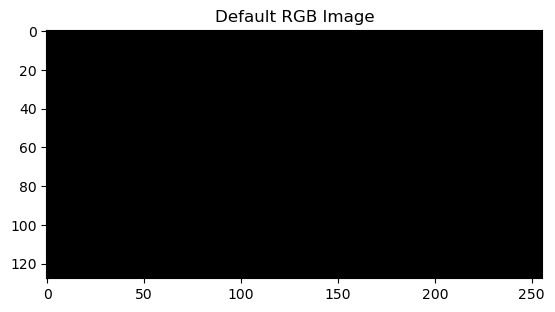

In [11]:
default_rgba = new_rgba_image(256,128)
fig, ax = plt.subplots()
ax.imshow(default_rgba)
ax.set_title('Default RGB Image')

Text(0.5, 1.0, 'New RGB Image')

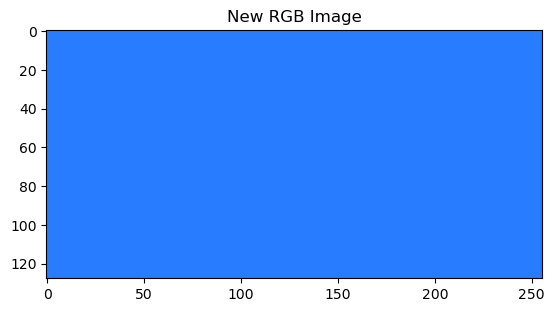

In [12]:
rgba = new_rgba_image(256, 128, (40, 124, 255, 255))
fig, ax = plt.subplots()
ax.imshow(rgba)
ax.set_title('New RGB Image')

## Q2 Creating a Checkerboard Image
A checkerboard image contains squares of alternating colors. We would like to write a function that creates an RGBA checkerboard image containing an `n_x`x`n_y` grid of squares of size `square_size`. The colors of neighboring squares should alternate between `color1`and `color2`.

In [13]:
def checkerboard_image(n_x, n_y, square_size=32,
                       color1=(0, 0, 0, 255),
                       color2=(255, 255, 255, 255)):
    image = np.zeros((n_y*square_size,n_x*square_size,4),dtype=np.uint8) #4 is corresponds to rgba channels
    for i in range(n_y):
        for j in range(n_x):
            color = color1 if (i+j) % 2 == 0 else color2 #at even numbers, square is the color1 else color2
            image[i*square_size:(i+1)*square_size,j*square_size:(j+1)*square_size,:] = color
    return image

Text(0.5, 1.0, 'Checkerboard Image')

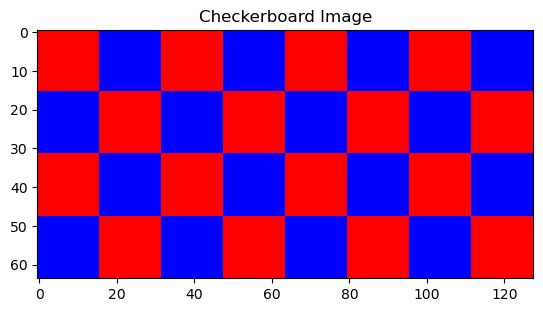

In [14]:
cb_image = checkerboard_image(8, 4, 16, (255, 0, 0, 255), (0, 0, 255, 255))
fig, ax = plt.subplots()
ax.imshow(cb_image)
ax.set_title('Checkerboard Image')

## Q3 Image Rotation Done Right
The function below rotates a given image around its center point by theta degrees. However, since they create an output image of the same size as the input, parts of the image becomes occluded. 

Text(0.5, 1.0, 'Rotated Checkerboard Image')

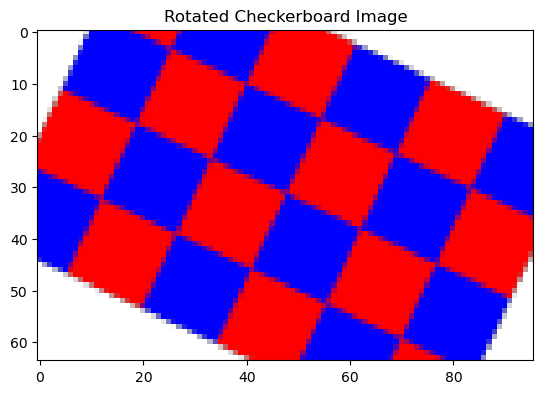

In [15]:
def rotate_image_around_center(img, theta_in_degrees):
    theta = theta_in_degrees * np.pi / 180.0
    ct = np.cos(theta)
    st = np.sin(theta)
    R = np.array([[ct, -st], [st, ct]])
    tc = np.array([img.shape[1] / 2.0, img.shape[0] / 2.0])
    t = - R @ tc + tc
    M = np.array([[R[0][0], R[0][1], t[0]], [R[1][0], R[1][1], t[1]]])
    rimg = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

    return rimg

cb_image = checkerboard_image(6, 4, 16, (255, 0, 0, 255), (0, 0, 255, 255))
rotated = rotate_image_around_center(cb_image, 25.0)
fig, ax = plt.subplots()
ax.imshow(rotated)
ax.set_title('Rotated Checkerboard Image')

Fill in the function below so that it calculates the proper size of the output image so that it will contain all parts of the original image. Note that you will have to change the translation vector so that the rotated is centered according to the output image size.

Text(0.5, 1.0, 'Fully Visible Rotated Checkerboard Image')

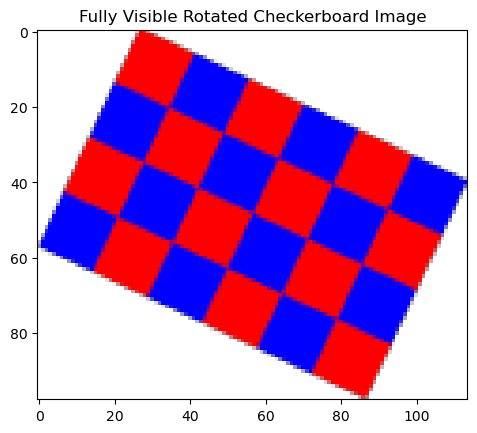

In [16]:
def rotate_image_full(img, theta_in_degrees):
    height, width = img.shape[:2]
    image_center = (width/2, height/2)
    M = cv2.getRotationMatrix2D(image_center, -theta_in_degrees, 1.0)
    
    #calculation new rotatied image bounds for fully visible
    cos_theta = np.abs(M[0, 0])
    sin_theta = np.abs(M[0, 1])
    bound_w = int(height * sin_theta + width * cos_theta)
    bound_h = int(height * cos_theta + width * sin_theta)

    #adjusting to M vector to center
    M[0, 2] += (bound_w - width) / 2
    M[1, 2] += (bound_h - height) / 2
    
    rotated_full_img = cv2.warpAffine(img, M, (bound_w, bound_h))

    return rotated_full_img

rotated_full = rotate_image_full(cb_image, 25.0)
fig, ax = plt.subplots()
ax.imshow(rotated_full)
ax.set_title('Fully Visible Rotated Checkerboard Image')